In [1]:
import pandas as pd
import os
import matplotlib as plt
from matplotlib import figure
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
%matplotlib inline

/usr/local/lib/python2.7/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_csv('winemag-data_first150k.csv')

In [3]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [4]:
# data cleanup
# look for any NA
# histogram for points, price

df.isnull().sum(axis=0)

Unnamed: 0         0
country            5
description        0
designation    45735
points             0
price          13695
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64

In [ ]:
#remove??

df.hist('price', bins = 10000).dropna()

In [6]:
df.describe()

,Unnamed: 0,points,price
count,150930.000000,150930.000000,137235.000000
mean,75464.500000,87.888418,33.131482
std,43569.882402,3.222392,36.322536
min,0.000000,80.000000,4.000000
25%,37732.250000,86.000000,16.000000
50%,75464.500000,88.000000,24.000000
75%,113196.750000,90.000000,40.000000
max,150929.000000,100.000000,2300.000000


In [7]:
dfprice = df[df['price']<500]

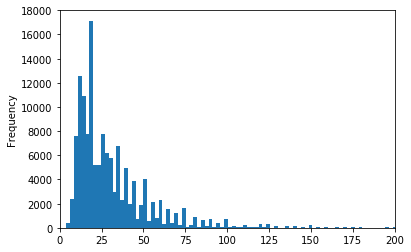

In [8]:
df['price'].plot.hist(bins=1000,xlim=(0,200))

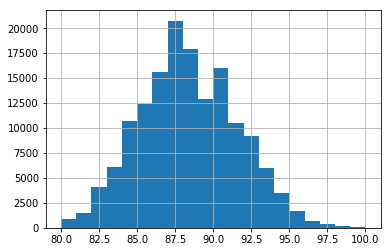

In [9]:
df['points'].hist(bins=20)

In [10]:
# based on the findings above, price has outliers. We will clean the data based on price

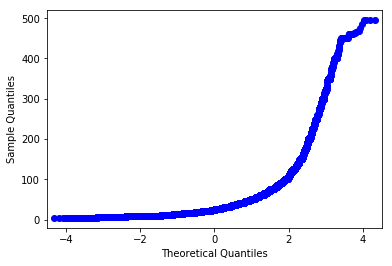

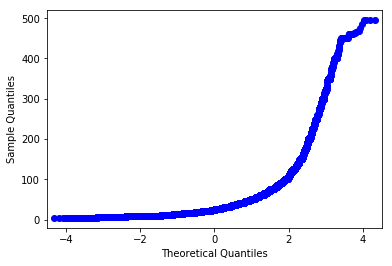

In [11]:
sm.graphics.qqplot(dfprice['price'], dist=stats.norm)

In [10]:
mean = df['price'].mean()

In [11]:
print(mean)

33.13148249353299


In [12]:
std = df['price'].std()

In [13]:
print(std)

36.322536196491264


In [14]:
df_price = df[df['price'] < (mean + 3*std) ]
len(df_price)

135558

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0463869890>,
      dtype=object)

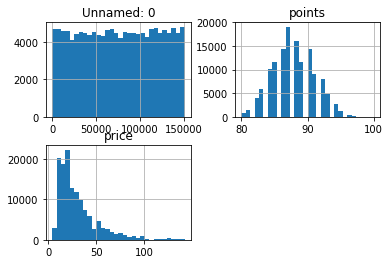

In [15]:
df_price.hist(bins=30)

In [16]:
chi2, p = stats.chisquare(df_price['price'])
print(chi2,p)

(2032950.816136196, 0.0)


In [17]:
chi2, p = stats.chisquare(df_price['points'])
print(chi2,p)

(15420.365801594126, 1.0)


# notes ...
### # of observations = 135,000
### types of grapes = 600
### most common types = 
### number of regions = 
### top 5 regions = 
### avg/median/max/min price + points

country
US        61800
Italy     18485
France    14123
Spain      8017
Chile      5746
Name: price, dtype: int64

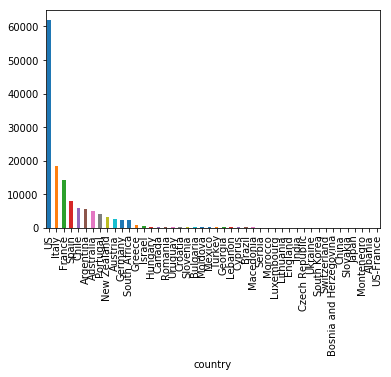

In [18]:
#top 5 countries
df_price.groupby('country').count()['price'].sort_values(ascending=False).plot(kind='bar')
df_price.groupby('country').count()['price'].sort_values(ascending=False)[0:5]

In [19]:
len(df_price['country'].unique())

47